In [1]:
# imports: 
import matplotlib.pyplot as plt
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import pydataset
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer


import warnings
warnings.filterwarnings("ignore")

import wrangle as wr

# Question 1: 
Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .

In [2]:
df = wr.create_zillow_data()
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


In [3]:
df = wr.prep_zillow(df)
df.head()

,bedrooms,bathrooms,area,taxvalue,yearbuilt,taxamount,county
4,4,2.0,3633,296425,2005,6941.39,LA
6,3,4.0,1620,847770,2011,10244.94,LA
7,3,2.0,2077,646760,1926,7924.68,LA
11,0,0.0,1200,5328,1972,91.60,LA
14,0,0.0,171,6920,1973,255.17,LA


In [4]:
# split the data:
train, validate, test = wr.split_zillow_data(df)
train.head()

,bedrooms,bathrooms,area,taxvalue,yearbuilt,taxamount,county
1567873,3,1.0,1248,191578,1950,2712.21,LA
1218138,2,2.0,1326,1345206,1950,16539.04,LA
339661,2,1.0,1053,356648,1953,4575.16,LA
1017133,3,2.0,1256,175069,1946,2635.51,LA
40250,3,2.0,1640,543000,1957,6344.96,Orange


## Min-Max Scaler

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1198531 entries, 1567873 to 372341
Data columns (total 7 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   bedrooms   1198531 non-null  int64  
 1   bathrooms  1198531 non-null  float64
 2   area       1198531 non-null  int64  
 3   taxvalue   1198531 non-null  int64  
 4   yearbuilt  1198531 non-null  int64  
 5   taxamount  1198531 non-null  float64
 6   county     1198531 non-null  object 
dtypes: float64(2), int64(4), object(1)
memory usage: 73.2+ MB


In [6]:
# make a copy of the data base so we dont mess with the original
train_scaled = train.copy()
train_scaled.head()

,bedrooms,bathrooms,area,taxvalue,yearbuilt,taxamount,county
1567873,3,1.0,1248,191578,1950,2712.21,LA
1218138,2,2.0,1326,1345206,1950,16539.04,LA
339661,2,1.0,1053,356648,1953,4575.16,LA
1017133,3,2.0,1256,175069,1946,2635.51,LA
40250,3,2.0,1640,543000,1957,6344.96,Orange


In [7]:
# what you want to scale: 
to_scale = ['taxamount','bedrooms','bathrooms','area']

In [8]:
# create the object:
scaler = sklearn.preprocessing.MinMaxScaler()

In [9]:
# fit the object
scaler.fit(train_scaled[to_scale])

MinMaxScaler()

In [10]:
# use the object (use the min, max to do the transdormation)
scaled_bill = scaler.transform(train_scaled[to_scale])
scaled_bill[:10]

array([[0.00250986, 0.2       , 0.03125   , 0.00130908],
       [0.0153351 , 0.13333333, 0.0625    , 0.00139097],
       [0.00423786, 0.13333333, 0.03125   , 0.00110437],
       [0.00243872, 0.2       , 0.0625    , 0.00131748],
       [0.00587946, 0.2       , 0.0625    , 0.0017206 ],
       [0.00226204, 0.2       , 0.0625    , 0.00118941],
       [0.00143142, 0.13333333, 0.0625    , 0.00131538],
       [0.00657322, 0.13333333, 0.03125   , 0.00086292],
       [0.00522887, 0.26666667, 0.0625    , 0.0019442 ],
       [0.00172404, 0.26666667, 0.0625    , 0.00164082]])

In [11]:
# assing the columns to the database
train_scaled[['taxamount_scaled', 'bedrooms_scaled','bathrooms_scaled','area_scaled']] = scaled_bill

In [12]:
# make new scaled columns for calidate and test (transform only)
validate[['taxamount_scaled', 'bedrooms_scaled','bathrooms_scaled','area_scaled']] = scaler.transform(validate[['taxamount','bedrooms','bathrooms','area']])
test[['taxamount_scaled', 'bedrooms_scaled','bathrooms_scaled','area_scaled']] = scaler.transform(test[['taxamount','bedrooms','bathrooms','area']])

In [13]:
# make vizualization: 
def visualize_scaler(scaler, df, columns_to_scale, bins=10):
    '''
    This function takes in a specific scaler, dataframe, 
    and returns two visuals of that data,
    one prior to scaling and one after scaling
    '''
    #make the figure
    fig, axs = plt.subplots(len(columns_to_scale), 2, figsize=(16,9))
    # make the dataframe
    df_scaled = df.copy()
    # scale the columns
    df_scaled[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
    # Create graphs of origianl and scaled datasets
    for (ax1, ax2), col in zip(axs, columns_to_scale):
        ax1.hist(df[col], bins=bins)
        ax1.set(title=f'{col} before scaling', xlabel=col, ylabel='count')
        ax2.hist(df_scaled[col], bins=bins)
        ax2.set(title=f'{col} after scaling with {scaler.__class__.__name__}', xlabel=col, ylabel='count')
    plt.tight_layout()

##### Min Max Scaler

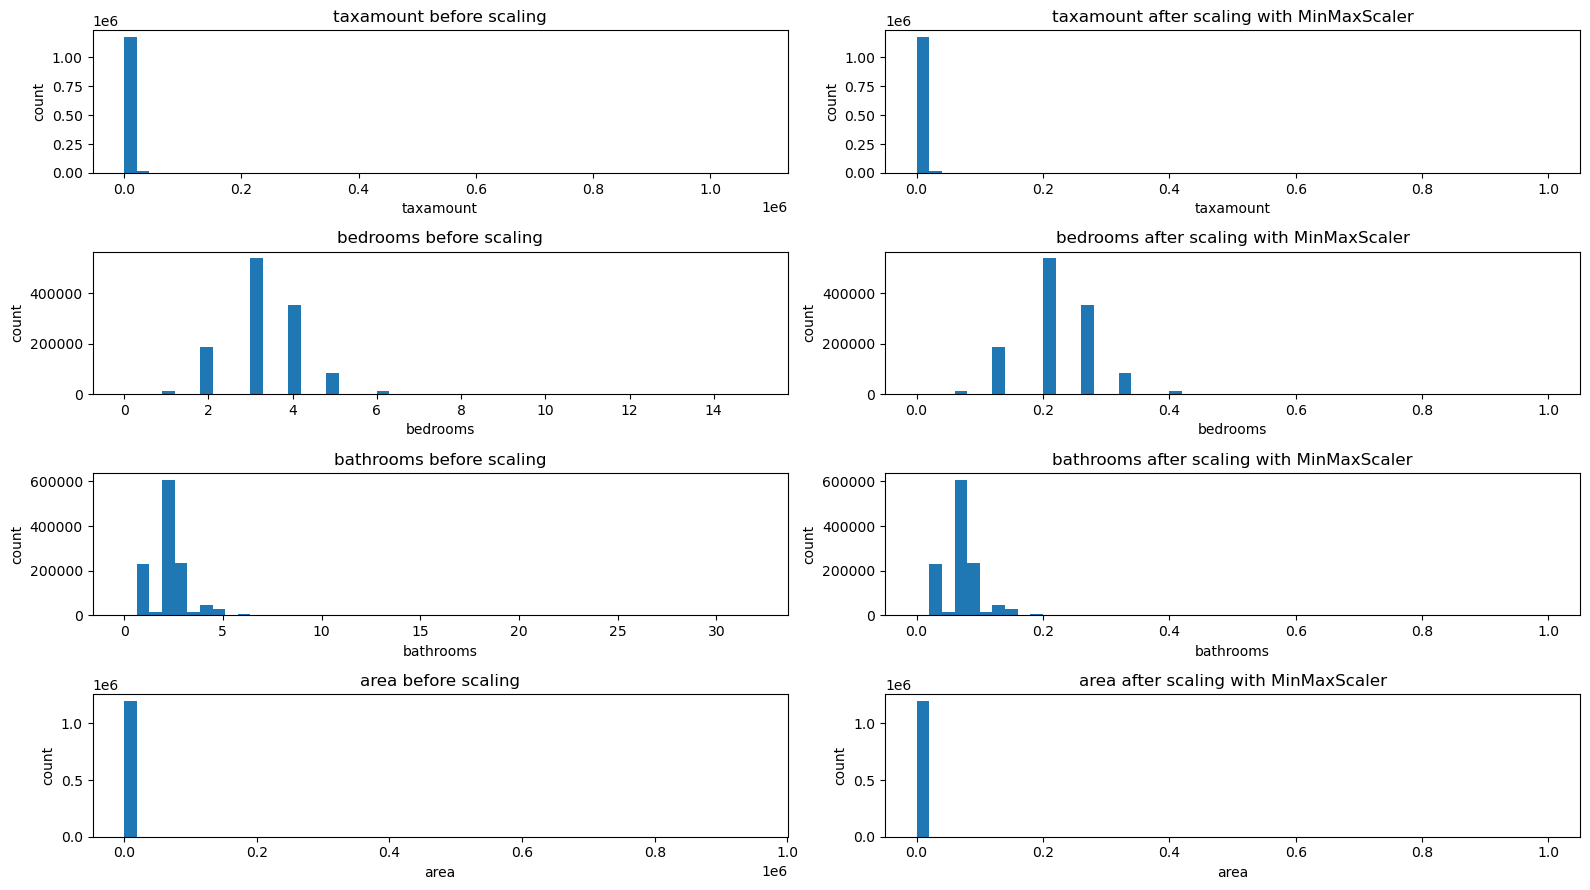

In [14]:
visualize_scaler(scaler=MinMaxScaler(), 
                 df=train, 
                 columns_to_scale=to_scale, 
                 bins=50)

##### Standard Scaler

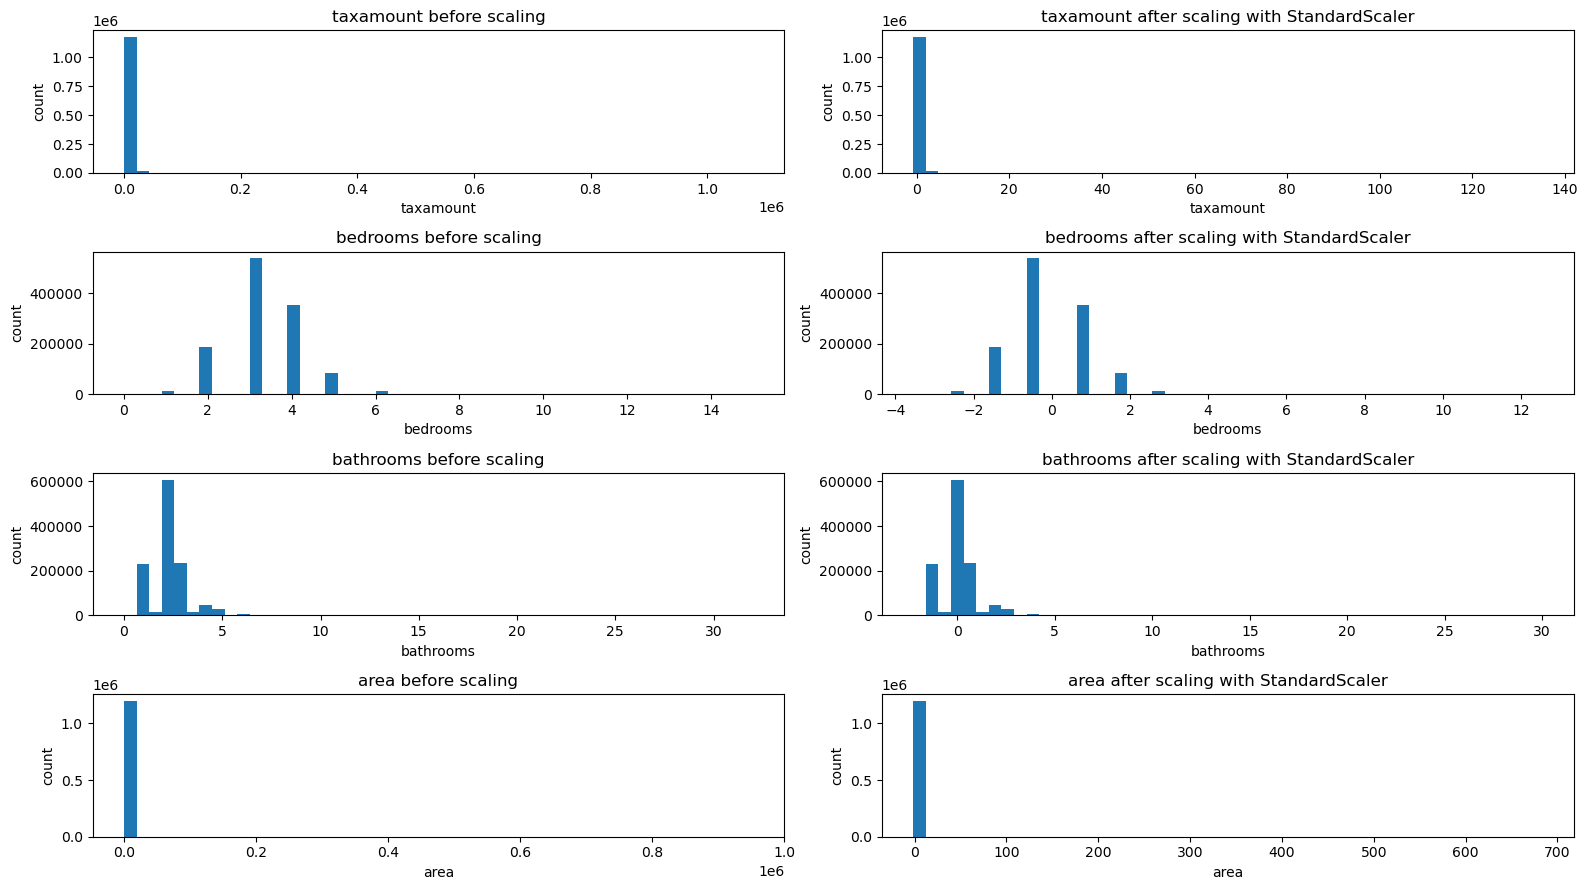

In [15]:
visualize_scaler(scaler=StandardScaler(), 
                 df=train, 
                 columns_to_scale=to_scale, 
                 bins=50)

##### Robust Scaler

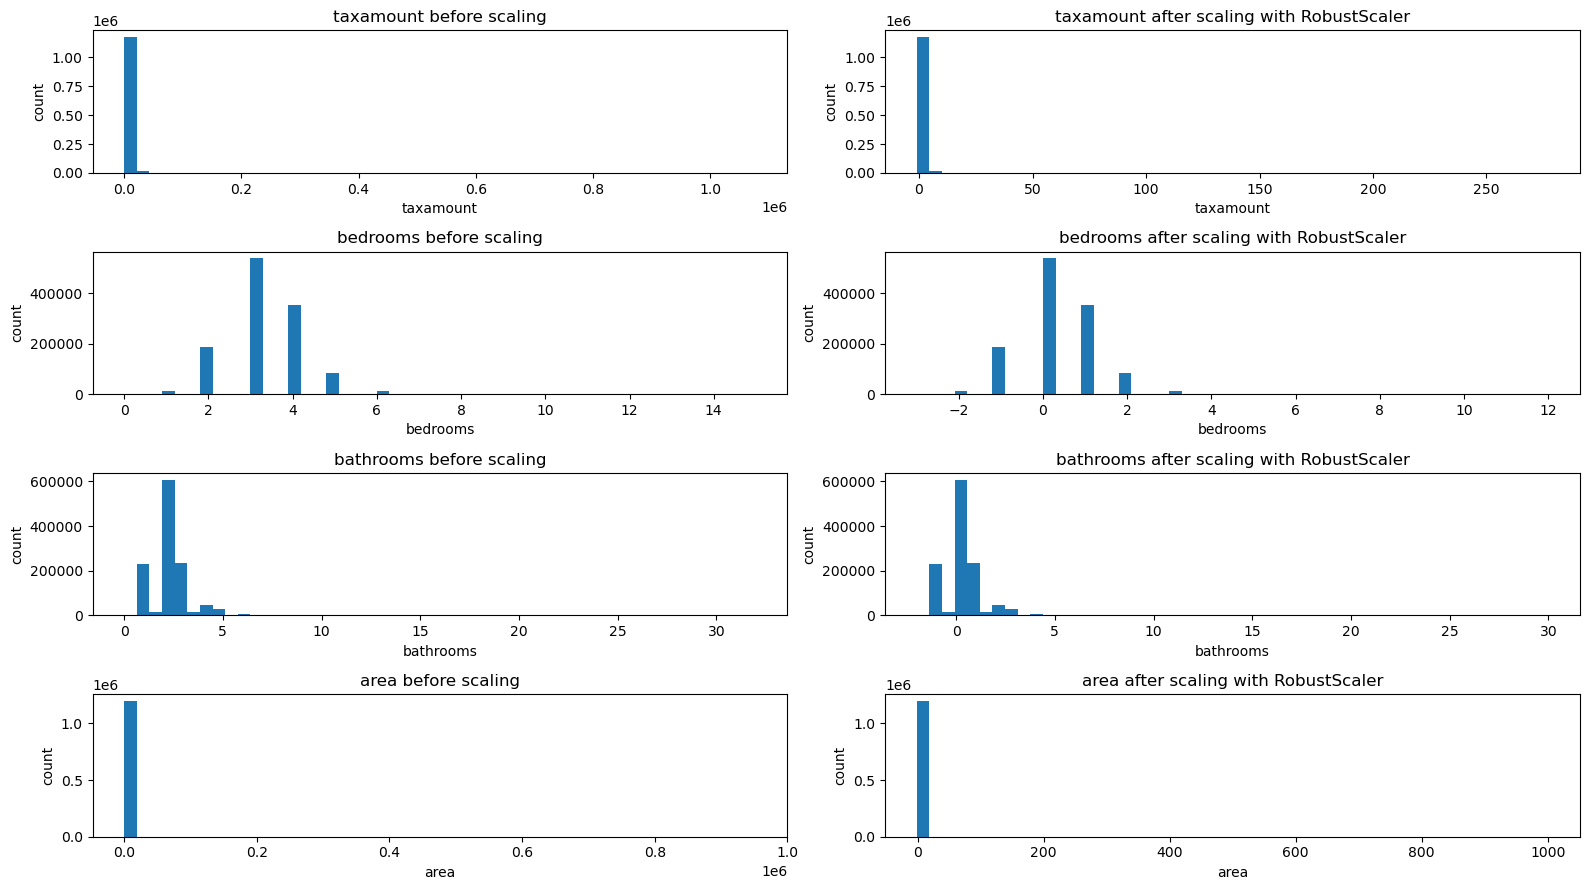

In [16]:
visualize_scaler(scaler=RobustScaler(), 
                 df=train, 
                 columns_to_scale=to_scale, 
                 bins=50)

# Quetion 2:
Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [17]:
#make it
scaler = MinMaxScaler()

#fit and use it
train_scaled = scaler.fit_transform(train[to_scale])

#convert to df
train_scaled = pd.DataFrame(train_scaled, columns=to_scale)

In [18]:
#appling the inverse_transform function to the scaled data
inverse_train_scaled = scaler.inverse_transform(train_scaled)
inverse_train_scaled

array([[2.712210e+03, 3.000000e+00, 1.000000e+00, 1.248000e+03],
       [1.653904e+04, 2.000000e+00, 2.000000e+00, 1.326000e+03],
       [4.575160e+03, 2.000000e+00, 1.000000e+00, 1.053000e+03],
       ...,
       [2.512910e+03, 3.000000e+00, 2.000000e+00, 1.742000e+03],
       [7.650550e+03, 4.000000e+00, 3.000000e+00, 2.066000e+03],
       [4.093400e+03, 3.000000e+00, 2.000000e+00, 1.260000e+03]])

In [19]:
#converting 2d array to df and adding column names
inverted_train = pd.DataFrame(inverse_train_scaled, columns=to_scale)
inverted_train

,taxamount,bedrooms,bathrooms,area
0,2712.21,3.0,1.0,1248.0
1,16539.04,2.0,2.0,1326.0
2,4575.16,2.0,1.0,1053.0
3,2635.51,3.0,2.0,1256.0
4,6344.96,3.0,2.0,1640.0
...,...,...,...,...
1198526,918.71,2.0,1.0,696.0
1198527,7319.49,3.0,3.0,2081.0
1198528,2512.91,3.0,2.0,1742.0
1198529,7650.55,4.0,3.0,2066.0


### Question 3: 
Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling

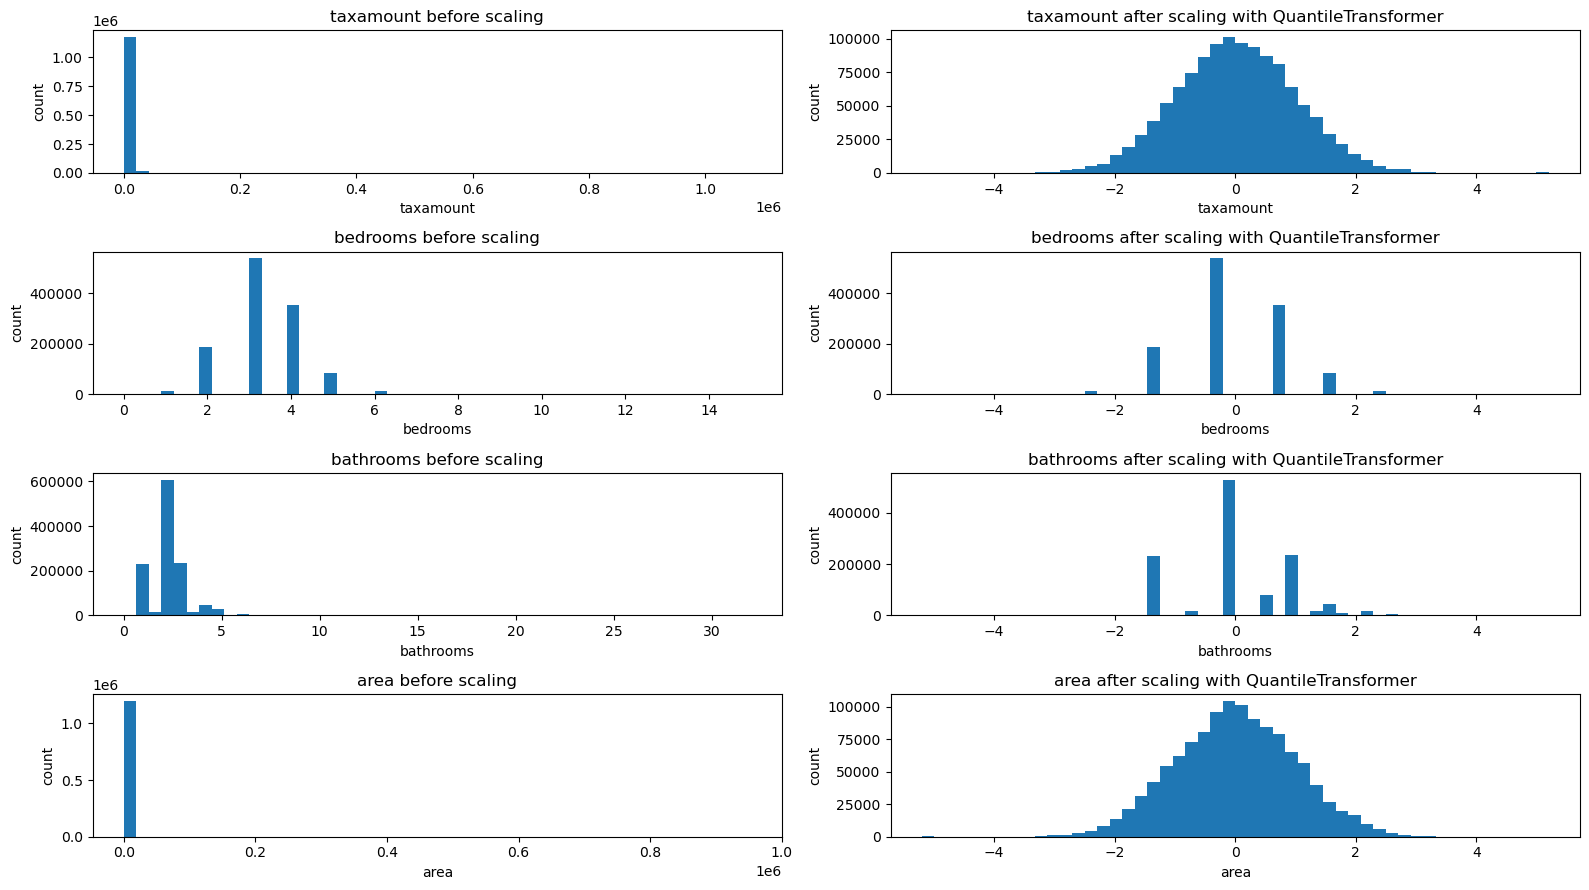

In [20]:
# call function using QuantileTransformer
visualize_scaler(scaler=QuantileTransformer(output_distribution='normal'), 
                 df=train,
                 columns_to_scale=to_scale, 
                 bins=50)

### Question 4:
Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

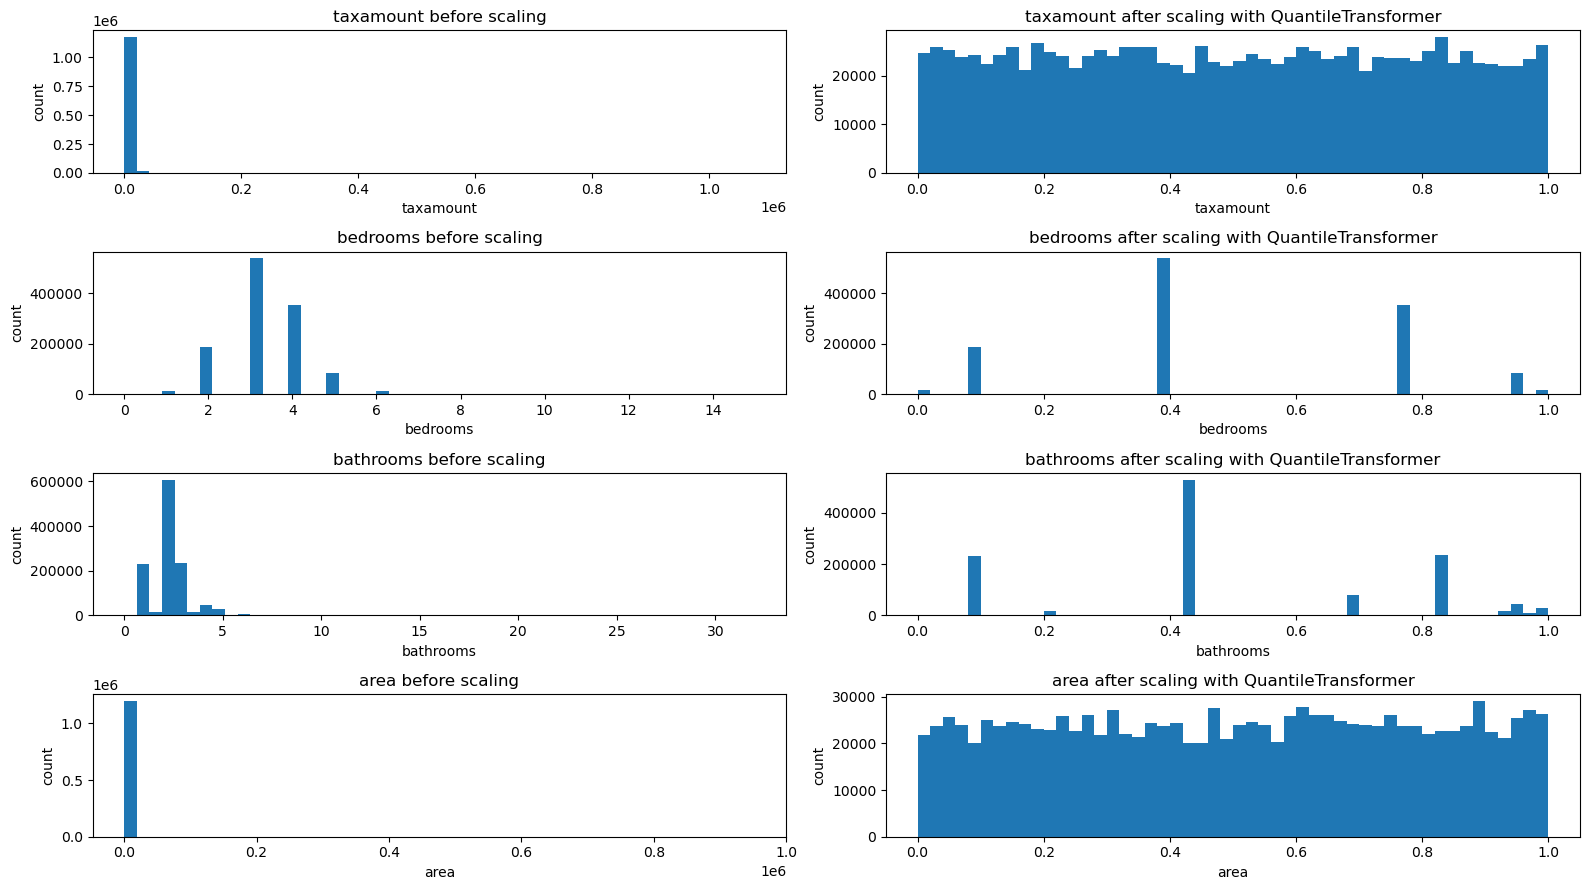

In [21]:
# call function using QuantileTransformer
visualize_scaler(scaler=QuantileTransformer(), 
                 df=train,
                 columns_to_scale=to_scale, 
                 bins=50)

### Question 5:
Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [28]:
# minmaxscaler
def scale_data(train, 
               validate, 
               test, 
               to_scale):
    #make copies for scaling
    train_scaled = train.copy()
    validate_scaled = validate.copy()
    test_scaled = test.copy()

    #scale them!
    #make the thing
    scaler = MinMaxScaler()

    #fit the thing
    scaler.fit(train[to_scale])

    #use the thing
    train_scaled[to_scale] = scaler.transform(train[to_scale])
    validate_scaled[to_scale] = scaler.transform(validate[to_scale])
    test_scaled[to_scale] = scaler.transform(test[to_scale])
    
    return train_scaled, validate_scaled, test_scaled

In [29]:
train_scaled, validate_scaled, test_scaled = scale_data(train, validate, test, to_scale)

In [30]:
train.head()

,bedrooms,bathrooms,area,taxvalue,yearbuilt,taxamount,county
1567873,3,1.0,1248,191578,1950,2712.21,LA
1218138,2,2.0,1326,1345206,1950,16539.04,LA
339661,2,1.0,1053,356648,1953,4575.16,LA
1017133,3,2.0,1256,175069,1946,2635.51,LA
40250,3,2.0,1640,543000,1957,6344.96,Orange


In [31]:
train.head()

,bedrooms,bathrooms,area,taxvalue,yearbuilt,taxamount,county
1567873,3,1.0,1248,191578,1950,2712.21,LA
1218138,2,2.0,1326,1345206,1950,16539.04,LA
339661,2,1.0,1053,356648,1953,4575.16,LA
1017133,3,2.0,1256,175069,1946,2635.51,LA
40250,3,2.0,1640,543000,1957,6344.96,Orange
